In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [46]:
data =pd.read_csv(r"creditcard.csv", delimiter = ',', on_bad_lines = 'skip')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286781,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
286782,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
286783,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
286784,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0


In [47]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [48]:
data["Class"].isna().sum()

1

Class
0.0    286289
1.0       496
Name: count, dtype: int64


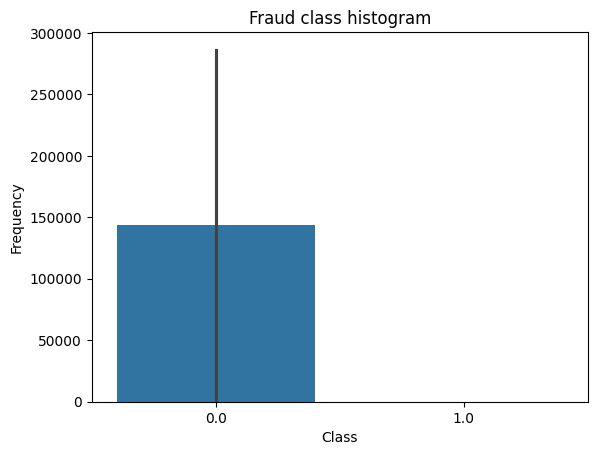

In [51]:
print(data["Class"].value_counts())

sns.barplot(x ='Class'
            ,y =data['Class'].value_counts()
            ,data =data)

plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler
std =StandardScaler()
amount =np.array(data['Amount'])
amount_reshaped =amount.reshape(-1 ,1)
data['normAmount'] =std.fit_transform(amount_reshaped)

In [53]:
X =np.array(data.iloc[: ,data.columns != "Class"])
y =np.array(data.iloc[: ,data.columns =="Class"])
print("shape of x :" ,X.shape)
print("shape of y :" ,y.shape)

shape of x : (286786, 31)
shape of y : (286786, 1)


In [55]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [56]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [57]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [61]:
# nRow, nCol = data.shape
# data.dataframeName = 'creditcard.csv'

In [64]:
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [65]:
X =np.array(data.iloc[: ,data.columns != "Class"])
y =np.array(data.iloc[: ,data.columns =="Class"])
print("shape of x :" ,X.shape)
print("shape of y :" ,y.shape)

shape of x : (286786, 28)
shape of y : (286786, 1)


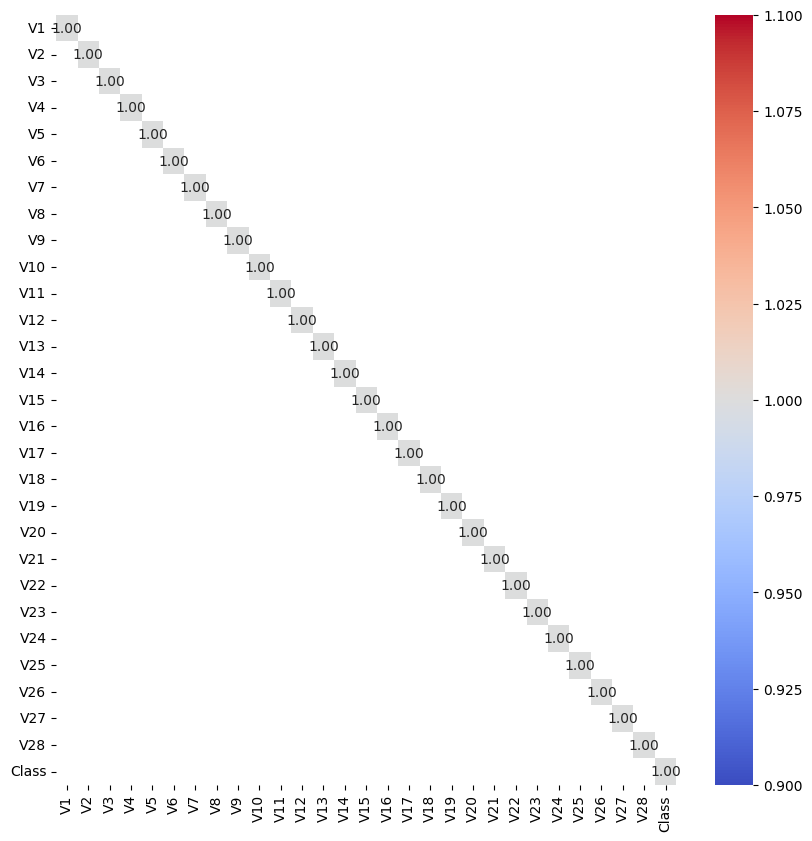

In [66]:
corr =data.corr().abs()
high_corr =corr[(corr)>0.5]
plt.figure(figsize =(10 ,10))
sns.heatmap(high_corr ,annot =True ,fmt ='0.2f',cmap='coolwarm')
plt.show()

In [67]:
data[data["Class"] ==1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1.0
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.0
2779,-0.734303,0.435519,-0.530866,-0.471120,0.643214,0.713832,-1.234572,-2.551412,-2.057724,0.166831,...,0.864536,-1.004877,1.150354,-0.152555,-1.386745,0.004716,0.219146,-0.058257,0.158048,1.0
2846,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,-5.515507,...,0.270013,1.049732,0.475840,0.404480,0.282030,-0.506901,-0.371741,0.615257,0.803163,1.0
3570,-4.793667,3.418911,-5.074445,4.035987,-3.527875,-1.923242,-5.065981,1.996885,-3.097379,-6.447202,...,0.342122,1.168618,0.289531,-0.371888,0.144761,0.084735,-0.197431,0.328672,0.835395,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281842,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.0
282122,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1.0
282128,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1.0
283123,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1.0


In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train ,y_test =train_test_split(X ,y ,test_size =0.3 ,random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (200750, 28)
Number transactions y_train dataset:  (200750, 1)
Number transactions X_test dataset:  (86036, 28)
Number transactions y_test dataset:  (86036, 1)


In [69]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [354]
Before OverSampling, counts of label '0': [200396] 

After OverSampling, the shape of train_X: (400792, 28)
After OverSampling, the shape of train_y: (400792,) 

After OverSampling, counts of label '1': 200396
After OverSampling, counts of label '0': 200396


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,precision_recall_curve ,auc ,roc_auc_score ,roc_curve ,recall_score ,classification_report


parameters = {
    'C': np.linspace(1, 10, 10)
             }

lr = LogisticRegression()
clf = GridSearchCV(lr,
                   parameters,
                   cv=5,
                   verbose=5,
                   n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [71]:
clf.best_params_

{'C': 4.0}

In [73]:
lr1 =LogisticRegression(C=4.0 ,penalty ='l2' ,verbose=5)
lr1.fit(X_train_res ,y_train_res.ravel())

LogisticRegression(C=4.0, verbose=5)

In [75]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        1

    thresh = cm.max() / 2.
    print('thresh' ,thresh)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white"
                 if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 92.37288135593221%
thresh 97560.5


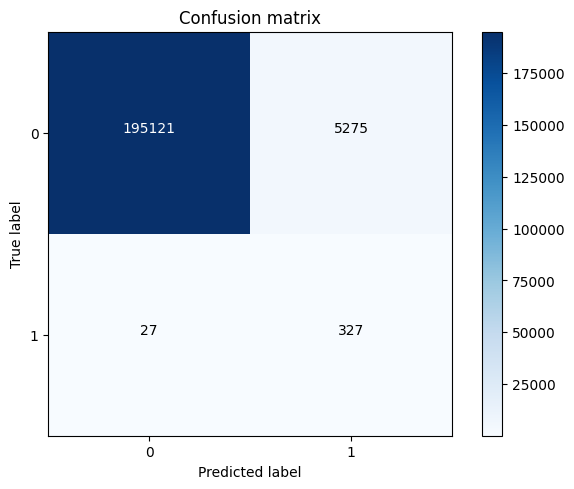

In [76]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [78]:
nan_indices = np.where(np.isnan(y_test))
print(f"NaN values found at indices: {nan_indices}")

NaN values found at indices: (array([50644]), array([0]))


In [80]:
y_test = y_test.flatten()
y_pre = y_train_pre.flatten()
non_nan_indices = ~np.isnan(y_test)
y_test_clean = y_test[non_nan_indices]
y_pre_clean = y_pre[non_nan_indices]

In [82]:
y_pre = lr1.predict(X_test)

y_test = y_test.flatten()
y_pre = y_pre.flatten()

non_nan_indices = ~np.isnan(y_test)
y_test_clean = y_test[non_nan_indices]
y_pre_clean = y_pre[non_nan_indices]

cnf_matrix = confusion_matrix(y_test_clean, y_pre_clean)

print("Recall metric in the testing dataset: {}%".format(100 * cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1])))


Recall metric in the testing dataset: 92.25352112676056%


thresh 41785.0


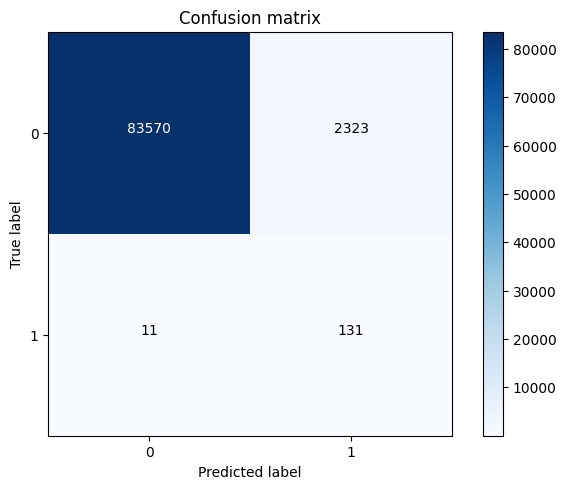

In [83]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [84]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

In [86]:
y_test = y_test.flatten()
y_pred_sample_score = y_pred_sample_score.flatten()

non_nan_indices = ~np.isnan(y_test) & ~np.isnan(y_pred_sample_score)
y_test_clean = y_test[non_nan_indices]
y_pred_sample_score_clean = y_pred_sample_score[non_nan_indices]

fpr, tpr, thresholds = roc_curve(y_test_clean, y_pred_sample_score_clean)

roc_auc = auc(fpr, tpr)

print("ROC AUC: {}".format(roc_auc))

ROC AUC: 0.9846457343012589


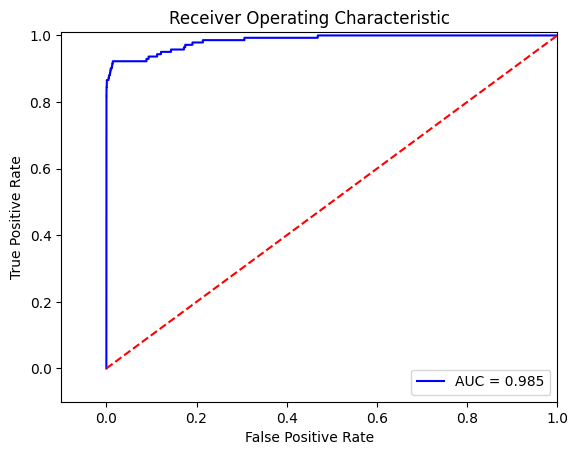

In [87]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score

In [89]:
roc_auc = auc(fpr, tpr)
print("ROC AUC: {}".format(roc_auc))

# Find the optimal threshold using Youden's J statistic: J = TPR - FPR
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold: {}".format(optimal_threshold))

y_pred_optimal = (y_pred_sample_score_clean >= optimal_threshold).astype(int)

# Calculate the confusion matrix
cnf_matrix = confusion_matrix(y_test_clean, y_pred_optimal)
print("Confusion Matrix:\n", cnf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test_clean, y_pred_optimal)
print("Accuracy: {:.2f}%".format(accuracy * 100))

ROC AUC: 0.9846457343012589
Optimal Threshold: 0.805028486404407
Confusion Matrix:
 [[84674  1219]
 [   11   131]]
Accuracy: 98.57%
